Lian Wira Manuel Maharaja
00000075938

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle 

import warnings
warnings.filterwarnings('ignore')


# Import DataSet

In [4]:
student = pd.read_csv("dataset.csv")
student.head()


Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [5]:
# check the shape of the dataset in student DataFrame
student.shape

(4424, 35)

In [6]:
# See which are the 35 columns
student.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [7]:
# How the data looks
student.sample(4)

Marital status  Application mode  Application order  Course  \
3956               1                 1                  3       9   
1230               1                 1                  1      10   
2656               1                 7                  1       2   
2051               1                 8                  1      10   

      Daytime/evening attendance  Previous qualification  Nacionality  \
3956                           1                       1            1   
1230                           1                       1            1   
2656                           1                       1            1   
2051                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
3956                      23                      14                   10   
1230                      13                      28                    6   
2656                       1                       3                    6   
2051                      23                      28                    8   

      ...  Curricular units 2nd sem (credited)  \
3956  ...                                    0   
1230  ...                                    0   
2656  ...                                    0   
2051  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
3956                                    5   
1230                                    6   
2656                                    0   
2051                                    6   

      Curricular units 2nd sem (evaluations)  \
3956                                       6   
1230                                      10   
2656                                       0   
2051                                       7   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
3956                                    5                         12.600000   
1230                                    5                         12.200000   
2656                                    0                          0.000000   
2051                                    6                         12.285714   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
3956                                               0                9.4   
1230                                               0               12.7   
2656                                               0               13.9   
2051                                               0               15.5   

      Inflation rate   GDP    Target  
3956            -0.8 -3.12  Graduate  
1230             3.7 -1.70  Graduate  
2656            -0.3  0.79  Graduate  
2051             2.8 -4.06  Graduate  

[4 rows x 35 columns]

In [8]:
student.head(5) 


Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

# Manipulasi Data

In [9]:
# Check info about all the columns 
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Pre-Processing

In [10]:
print(student.isnull().sum())


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [11]:
print(student.duplicated().sum())

0


In [12]:
student['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

dibawah ini untuk mengatasi nilai null 

In [13]:
# Tangani nilai null (jika ada)
student['Target'].fillna('Dropout', inplace=True)


So there are 3 unique values in target column which we can replace by:
- Dropout -> 0 
- Enrolled -> 1 
- Graduate -> 2

In [14]:
# Ganti nilai yang tidak sesuai dengan 'Dropout' dengan 0 (atau nilai lain yang sesuai)
student['Target'] = student['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

In [15]:
# Check Target column, it must have filled with 0, 1 & 2
student

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [16]:
student.dtypes
# Target column is integer now

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [17]:
# Learn the data mathematically
student.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 2nd sem (credited)  \
count  ...                          4424.000000   
mean   ...                             0.541817   
std    ...                             1.918546   
min    ...                             0.000000   
25%    ...                             0.000000   
50%    ...                             0.000000   
75%    ...                             0.000000   
max    ...                            19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000                       4424.000000   
mean                              4.435805                         10.230206   
std                               3.014764                          5.210808   
min                               0.000000                          0.000000   
25%                               2.000000                         10.750000   
50%                               5.000000                         12.200000   
75%                               6.000000                         13.333333   
max 

In [18]:
# Terakhir temukan korelasi Target dengan semua kolom numerik lainnya
student.corr()['Target']


Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [19]:
fig = px.imshow(student)
fig.show()

# Pembatasan Permasalahan

Melihat korelasinya, kita perlu memilih kolom yang diperlukan untuk prediksi.¶

In [20]:
# This is the new Df considering relevant input and output columns
student_df = student.iloc[:,[1,11,13,14,15,16,17,20,22,23,26,28,29,34]]

In [21]:
student_df.head()


Application mode  Displaced  Debtor  Tuition fees up to date  Gender  \
0                 8          1       0                        1       1   
1                 6          1       0                        0       1   
2                 1          1       0                        0       1   
3                 8          1       0                        1       0   
4                12          0       0                        1       0   

   Scholarship holder  Age at enrollment  Curricular units 1st sem (enrolled)  \
0                   0                 20                                    0   
1                   0                 19                                    6   
2                   0                 19                                    6   
3                   0                 20                                    6   
4                   0                 45                                    6   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (approved)  \
0                                    0                                    0   
1                                    6                                    6   
2                                    6                                    0   
3                                    6                                    5   
4                                    6                                    6   

   Curricular units 2nd sem (grade)  Target  
0                          0.000000       0  
1                         13.666667       2  
2                          0.000000       0  
3                         12.400000       2  
4                         13.000000       2

In [22]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application mode                     4424 non-null   int64  
 1   Displaced                            4424 non-null   int64  
 2   Debtor                               4424 non-null   int64  
 3   Tuition fees up to date              4424 non-null   int64  
 4   Gender                               4424 non-null   int64  
 5   Scholarship holder                   4424 non-null   int64  
 6   Age at enrollment                    4424 non-null   int64  
 7   Curricular units 1st sem (enrolled)  4424 non-null   int64  
 8   Curricular units 1st sem (approved)  4424 non-null   int64  
 9   Curricular units 1st sem (grade)     4424 non-null   float64
 10  Curricular units 2nd sem (enrolled)  4424 non-null   int64  
 11  Curricular units 2nd sem (appr

<Axes: >

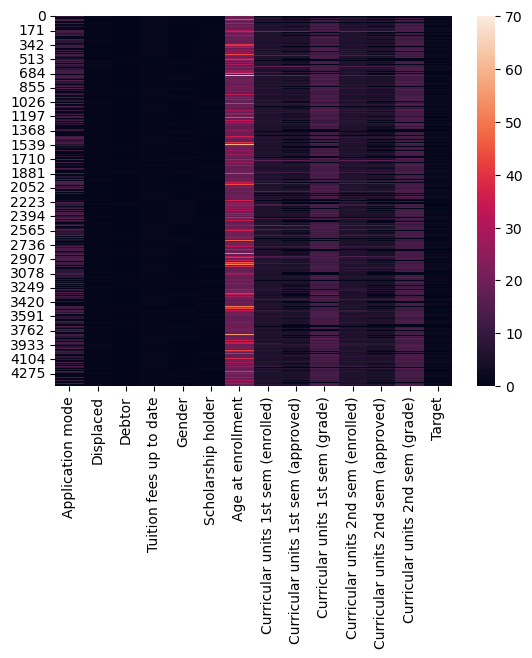

In [23]:
sns.heatmap(student_df)

Exploratory Data Analysis on student_df

In [24]:
# sekarang ssaya ingin tau Berapa jumlah putus sekolah, terdaftar & lulusan yang ada di kolom Target
student_df['Target'].value_counts()


Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [25]:
# Plot the above values
x = student_df['Target'].value_counts().index
y = student_df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [29]:
# # Sekarang lihat korelasi Target dengan yang lainnya
student_df.corr()['Target']

Application mode                      -0.212025
Displaced                              0.113986
Debtor                                -0.240999
Tuition fees up to date                0.409827
Gender                                -0.229270
Scholarship holder                     0.297595
Age at enrollment                     -0.243438
Curricular units 1st sem (enrolled)    0.155974
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Target                                 1.000000
Name: Target, dtype: float64

Mari kita plot kolom Unit Kurikulum semester ke-2 (disetujui) dengan Unit Kurikulum semester pertama (disetujui) dan bedakan Target berdasarkan warna¶

In [28]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

Mari kita plot kolom Satuan Kurikulum Semester 1 (kelas) dengan Satuan Kurikulum Semester 1 (kelas) dan bedakan Target berdasarkan warna

In [43]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             color = 'Target')
fig.show()

In [31]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [32]:
fig = px.box(student_df, y='Age at enrollment')
fig.show()

<Axes: xlabel='Age at enrollment', ylabel='Count'>

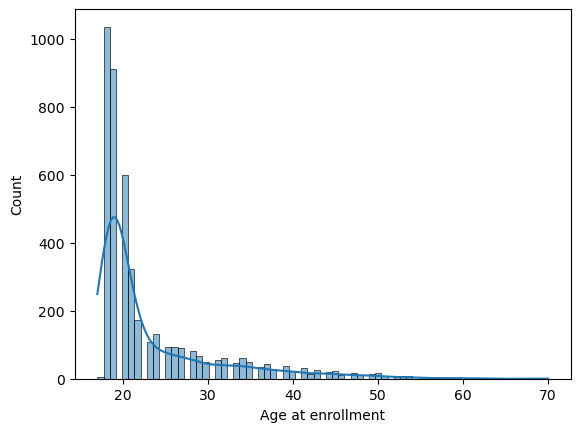

In [33]:
#Distribusi usia siswa pada saat pendaftaran
sns.histplot(data=student_df['Age at enrollment'], kde=True)

In [35]:
#Mari kita coba plotly histogram supaya  gambar interaktif
px.histogram(student_df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['blue'])

Extract Input & Output Columns

In [36]:
X = student_df.iloc[:,0:13]
y = student_df.iloc[:,-1]
X

Application mode  Displaced  Debtor  Tuition fees up to date  Gender  \
0                    8          1       0                        1       1   
1                    6          1       0                        0       1   
2                    1          1       0                        0       1   
3                    8          1       0                        1       0   
4                   12          0       0                        1       0   
...                ...        ...     ...                      ...     ...   
4419                 1          0       0                        1       1   
4420                 1          1       1                        0       0   
4421                 1          1       0                        1       0   
4422                 1          1       0                        1       0   
4423                 5          1       0                        1       0   

      Scholarship holder  Age at enrollment  \
0                      0                 20   
1                      0                 19   
2                      0                 19   
3                      0                 20   
4                      0                 45   
...                  ...                ...   
4419                   0                 19   
4420                   0                 18   
4421                   1                 30   
4422                   1                 20   
4423                   0                 22   

      Curricular units 1st sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    7   
4422                                    5   
4423                                    6   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                       0                          0.000000   
1                                       6                         14.000000   
2                                       0                          0.000000   
3                                       6                         13.428571   
4                                       5                         12.333333   
...                                   ...                               ...   
4419                                    5                         13.600000   
4420                                    6                         12.000000   
4421                                    7                         14.912500   
4422                                    5                         13.800000   
4423                                    6                         11.666667   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  
0                                       0                          0.000000  
1                                       6                         13.666667  
2                                       0                          0.000000  
3                                       5                         12.400000  
4                                       6                         13.000000  
...  

Memisahkan data menjadi Traning dan Testing Data

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 13)
(885, 13)
(3539,)
(885,)


Training the model

# # Decision Tree Classifier


In [41]:
# Decision Tree Classifier
# Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6587570621468927
Without Scaling and With CV:  0.6773163041564636


evaluation decission tree

Decision Tree Without Scaling and without CV:  0.6587570621468927
Decision Tree Without Scaling and With CV:  0.6773163041564636
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       313
           1       0.33      0.40      0.36       157
           2       0.77      0.79      0.78       415

    accuracy                           0.66       885
   macro avg       0.61      0.60      0.60       885
weighted avg       0.67      0.66      0.66       885

Confusion matrix, without normalization
[[326   0]
 [  0   0]]


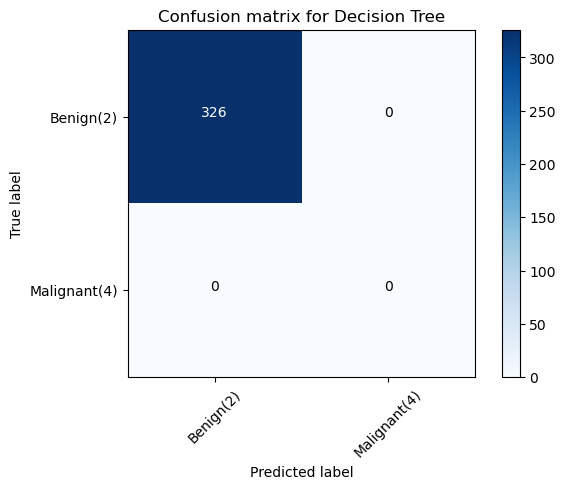

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Without scaling
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Decision Tree Without Scaling and without CV: ", accuracy_score(y_test, y_pred))

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Decision Tree Without Scaling and With CV: ", scores.mean())

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2, 4])
np.set_printoptions(precision=2)

# Classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'],
                      normalize=False, title='Confusion matrix for Decision Tree')

# Show the plot
plt.show()


# Modeling (SVM with Scikit-learn)

evaluation svm

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Without Scaling and CV:  0.7446327683615819
Without Scaling and With CV:  0.7202637601830956
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       313
           1       0.52      0.31      0.39       157
           2       0.73      0.97      0.83       415

    accuracy                           0.74       885
   macro avg       0.71      0.65      0.66       885
weighted avg       0.74      0.74      0.72       885

Confusion matrix, without normalization
[[403   0]
 [  0   0]]


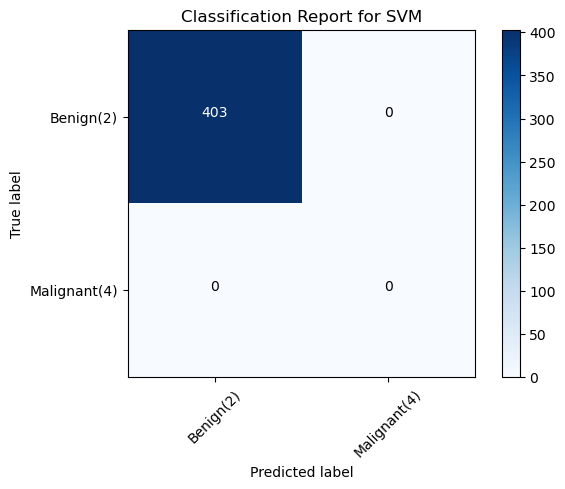

In [55]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Fungsi plot_confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Membuat model SVM
clf = LinearSVC(random_state=0, tol=1e-5)

# Melatih model dan membuat prediksi
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Mengukur kinerja tanpa penskalaan dan dengan validasi silang
print("Without Scaling and CV: ", accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ", scores.mean())

# Menghitung dan menampilkan matriks kebingungan
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2, 4])
np.set_printoptions(precision=2)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'],
                      normalize=False, title='Classification Report for SVM')


# Tampilkan plot
plt.show()


In [42]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7446327683615819
Without Scaling and With CV:  0.7202637601830956
